Import Necessary Library:

In [2]:
!pip install split-folders
!pip install split-folders tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import splitfolders
import matplotlib.pyplot as plt

Import Dataset from Belajar Machine Learning untuk Pemula:

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-17 07:58:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.70MB/s    in 40s     

2020-10-17 07:59:17 (7.68 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
local_file = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
os.listdir('/tmp')

['rockpaperscissors.zip', '__MACOSX', 'rockpaperscissors']

In [8]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                   output="/tmp/rockpaperscissors/", 
                   seed=42, ratio=(.8, .2))

base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 5632.58 files/s]


Creating Directory for Training and Validation Data:

In [9]:
train_scissor_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')

validation_scissor_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(150,150),
                      batch_size=4,
                      class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                          validation_dir,
                          target_size=(150,150),
                          batch_size=4,
                          class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      print("\nThe accuracy of the training set and validation set has reached > 90%")
      self.model.stop_training = True
callbacks = myCallback()

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
history = model.fit(
            train_generator,
            steps_per_epoch=25,  
            epochs=20,
            validation_data=validation_generator, 
            validation_steps=5, 
            callbacks=[callbacks], 
            verbose=2)

Epoch 1/20
25/25 - 2s - loss: 0.4069 - accuracy: 0.8700 - val_loss: 0.4260 - val_accuracy: 0.8500
Epoch 2/20
25/25 - 2s - loss: 0.4172 - accuracy: 0.9381 - val_loss: 0.5114 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 2s - loss: 0.1797 - accuracy: 0.9400 - val_loss: 0.2928 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 2s - loss: 0.1895 - accuracy: 0.9500 - val_loss: 0.2105 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 2s - loss: 0.1213 - accuracy: 0.9500 - val_loss: 0.3095 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 2s - loss: 0.3945 - accuracy: 0.8400 - val_loss: 0.7501 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 2s - loss: 0.2515 - accuracy: 0.9400 - val_loss: 0.2686 - val_accuracy: 0.9000
Epoch 8/20

The accuracy of the training set and validation set has reached > 90%
25/25 - 2s - loss: 0.2030 - accuracy: 0.9100 - val_loss: 0.0579 - val_accuracy: 1.0000


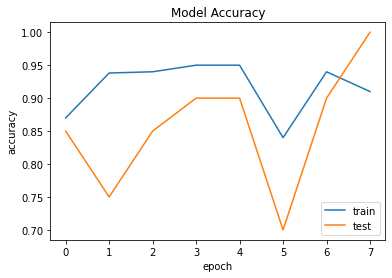

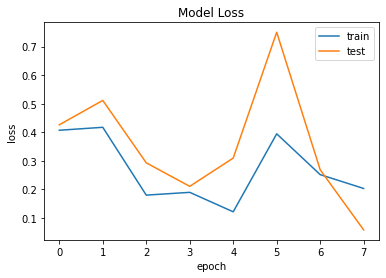

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Converting Model:

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpy9kbf68a/assets


In [29]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)